# Práctica 3 - Gradiente, Combinador Lineal y Regresión

El objetivo de esta práctica es comprender el funcionamiento del descenso del gradiente y los combinadores lineales.

**Temas**
* Optimización con descenso del gradiente.
* Regresión lineal simple y múltiple.
* Regresión logística multiclase

# Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
FUENTES_DIR = '/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901'
DATOS_DIR = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901'      # carpeta donde se encuentran los datasets
# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Ejercicio 2

El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k.
La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por:

<p align= center>𝑃 (𝑗, 𝑘) = 𝑘 2 − 2𝑗𝑘 + 2𝑗 2 + 18𝑗 − 20𝑘 + 201 </p>

donde el precio está dado en miles de dólares.
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de la vivienda.

Paso 1: Calcular las derivadas parciales

  $\mathrm P(j,k)={k² - 2jk + 2j² + 18j + 20k + 201}$

<p> Derivada de P respecto de j</p>


  $\delta P \mid \delta j = 0 - 2*1k + 2*2j + 18*1 + 0+0$

  $\delta P \mid \delta j = -2k+4j+18 $


<p> Derivada de P respecto de k</p>

  $\delta P \mid \delta j = 2k -2j*1 +0+0+20*1+0 $

  $\delta P \mid \delta j = 2k-2j+20 $


In [ ]:
def P(j, k):
  return k**2 - 2*j*k + 2*j**2 + 18*j - 20*k + 201

In [ ]:
# Calcular derivadas parciales
def dP_dj(j,k):
  return -2*k + 4*j +18

def dP_dk(j,k):
  return 2*k - 2*j - 20

In [ ]:
alpha = 0.01
max_iteraciones = 1000
cota = 0.0001

(j,k,z,z_new) = (1,1, P(1,1), P(1,1)+1)

iteraciones = 0

while iteraciones < max_iteraciones and (abs(z_new -z) > cota):
  z = z_new

  gradiente_j = dP_dj(j,k)
  gradiente_k = dP_dk(j,k)

  j = j - alpha*gradiente_j
  k = k - alpha*gradiente_k

  z_new = P(j,k)
  iteraciones +=1

  print(f"{iteraciones:>4} {j:>10.5f} {k:>10.5f} {P(j,k):8.2f}")

print(f'Valor óptimo de j:{j:8.5f} \nValor óptimo de k: {k:8.5f} \nPrecio mínimo: {(1000*P(j,k)):7.0f} dólares')


   1    0.80000    1.20000   192.20
   2    0.61200    1.39200   185.16
   3    0.43536    1.57640   178.80
   4    0.26947    1.75358   173.05
   5    0.11377    1.92390   167.86
   6   -0.03231    2.08769   163.16
   7   -0.16926    2.24529   158.91
   8   -0.29758    2.39700   155.05
   9   -0.41774    2.54311   151.56
  10   -0.53017    2.68389   148.39
  11   -0.63528    2.81961   145.51
  12   -0.73348    2.95052   142.90
  13   -0.82513    3.07684   140.52
  14   -0.91059    3.19880   138.35
  15   -0.99019    3.31661   136.37
  16   -1.06425    3.43047   134.57
  17   -1.13307    3.54058   132.92
  18   -1.19694    3.64711   131.41
  19   -1.25612    3.75022   130.03
  20   -1.31087    3.85010   128.76
  21   -1.36143    3.94688   127.59
  22   -1.40804    4.04071   126.51
  23   -1.45090    4.13174   125.52
  24   -1.49023    4.22008   124.60
  25   -1.52622    4.30588   123.75
  26   -1.55905    4.38924   122.97
  27   -1.58891    4.47027   122.23
  28   -1.61594    4.54909  

# Ejercicio 3

A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

<br>

 |Horas de entrenamiento|Tiempo Promedio (mins)|
 |----------------------|----------------------|
 |2|30.5|
 |3|29.3|
 |4|26.7|
 |4|26.0|
 |5|25.5|
 |6|24.7|
 |6|23.5|
 |7|23.0|
 |7|22.5|
 |8|21.0|
 |10|21.0|
 |10|20.5|

<br>
A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales. Responder:

##3.a)

Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?


In [ ]:
horas_entrenamiento = np.array([2,3,4,4,5,6,6,7,7,8,10,10])
tiempo_promedio_en_mins = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5,21.0, 21.0, 20.5])

In [ ]:
correlacion = np.corrcoef(horas_entrenamiento, tiempo_promedio_en_mins)[0,1]
correlacion

-0.959746386006859

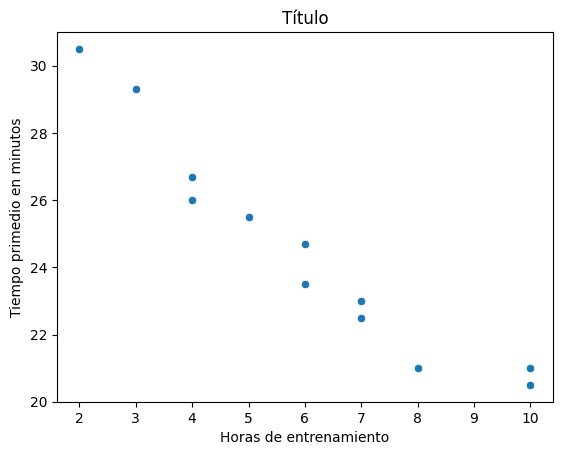

In [ ]:
sns.scatterplot(x=horas_entrenamiento, y=tiempo_promedio_en_mins)
plt.xlabel('Horas de entrenamiento')
plt.ylabel('Tiempo primedio en minutos')
plt.title('Título')
plt.show()

Hay una correlación negativa fuerte entre los atributos. Mirando el gráfico, podríamos decir que la recta sí será de utilidad.

##3.b)

Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.

**Respuesta:**

La ecuación de predicción es del tipo $ \hat{y}=wx+b$, donde w es el coeficiente de la variable independiente x y b es el sesgo (intercepto).

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$

Tengo los puntos: (2, 30.5), (3, 29.3), (4, 26.7), (4, 26.0), (5, 25.5), (6, 24.7), (6, 23.5), (7, 23.0), (7, 22.5), (8, 21.0), (10, 21.0), (10, 20.5)

$$
MSE = \frac{1}{12}[(2 - w_0 - 30.5w_1)² + (3-w_0-29.3w_1)² + (4-w_0-26.7w_1)² + (4-w_0- 26.0w_1)² + (5-w_0-25.5w_1)² + (6-w_0-24.7w_1)² + (6-w_0-23.5w_1)² + (7-w_0-23.0w_1)² + (7-w_0-22.5w_1)² + (8-w_0-21.0w_1)² + (10-w_0 - 21.0w_1)² + (10-w_0-20.5w_1)²]\\
$$

$$
MSE = \frac{1}{12}[(4 +w_0² +930.25w_1² -4w_0 -122w_1+60.1w_0w_1) + (9+w_0²+854,49w_1²-6w_0-178,5w_1+58,6w_0w_1)+(16+w_0²+650,25w_1²-8w_0-244w_1+534w_0w_1)+(16+w_0²+675w_1²-8w_0-208w_1+52w_0w_1)+(25+w0²+650,25w_1²-10w_0-255w_1+51w_0w_1)+(36+w_0²+610,09w_1²-12w_0-296,4w_1+494w_0w_1)+(36+w_0²+552,25w_1²-12w_0-28,2w_1+47w_0w_1)+(49+w_0²+529w_1²-14w_0-315w_1+45w_0w_1)+(49+w_0²+506,25w_1²-14w_0-315w_1+45w_0w_1)+(100+w_0²+441w_1²-100w_0-2100w_1+42w_0w_1)+(100+w_0²+420,25w_1²-100w_0-2050w_1+41w_0w_1)] \\
$$

$$
MSE = \frac{1}{12}[440+12w_0²+6823.08w_1²-288w_0-6119w_1+1470.6w_0w_1]
$$

Derivadas parciales:

$$
\frac{df}{dw_0} = \frac{24w_0-288+1470.6w_1}{12}\\
$$

$$
\frac{df}{dw_1} = \frac{13646.16w_1-6119+1470.6w_0}{12}\\
$$

Calcular vector gradiente

$$
\nabla\xi = <\frac{df}{dw_0} , \frac{df}{dw_1}> = < \frac{24w_0-288+1470.6w_1}{12} , \frac{13646.16w_1-6119+1470.6w_0}{12}>
$$

Actualizar pesos:
$$
w(t+1) = w(t)- \alpha * \nabla\xi w(t)
$$

##3.c)

**Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico. ¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?**

$$ Error = (y_i - (wx_i +b))^2 $$

Calcula el error cuadŕatico medio para una sola muestra i en cada iteración.
La ventaja es que realiza actualizaciones más rápido y con más frecuencia, lo que permite encontrar una solución óptima más rápido , por lo que es adecuado para conjuntos de datos grandes.

##3.d)

**Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales.**


In [25]:
from ClassNeuronaLineal import NeuronaLineal

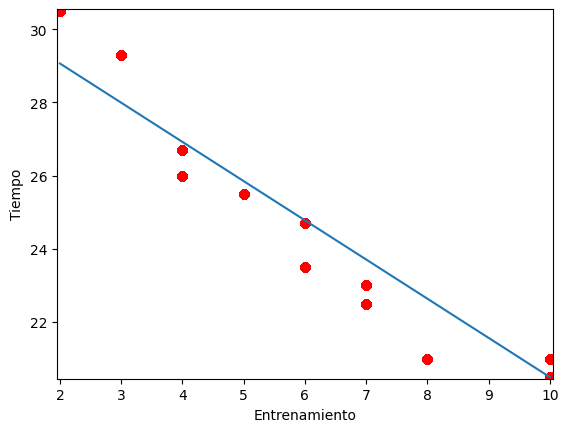

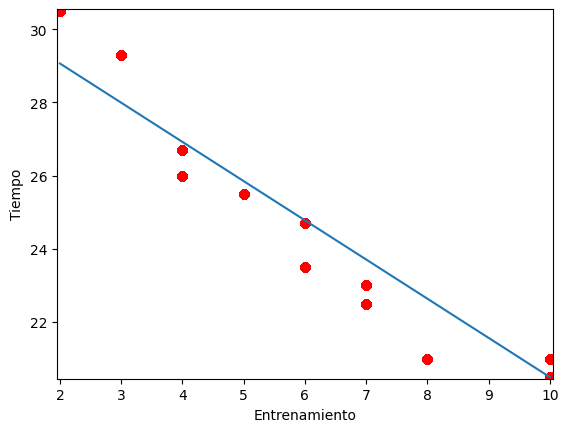

In [ ]:
X_train =  horas_entrenamiento.reshape(-1,1)
Y_train = tiempo_promedio_en_mins.reshape(-1,1)

print(f'X_train shape: {X_train.shape} \nY_train shape: {Y_train.shape}')

modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo.fit(X_train, Y_train)


In [ ]:
print(f'Pesos: \nW: {modelo.w_} \nBias: {modelo.b_}')

Pesos: 
W: [-1.07114035] 
Bias: [31.2061737]


##3.e)

**Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia fija un corredor que entrena 9 horas semanales.**

***Respuesta:***

De acuerdo a los valores que obtuve en el punto anterior, el tiempo promedio está determinado por:

$\mathrm y = -1.07113146 * x + 31.20608475 $

reemplanzado $\mathrm x$ por las horas:

$\mathrm y = -1.07113146 * 9 + 31.20608475 $


In [ ]:
print(f'Tiempo promedio: {-1.07113146 * 9 + 31.20608475} minutos.')

Tiempo promedio: 21.565901609999997 minutos.


In [ ]:
horas = 9
mins = modelo.predict([horas])

print(f'Tiempo promedio en minutos que predice el modelo: {mins[0]}')

Tiempo promedio en minutos que predice el modelo: 21.56591052669323


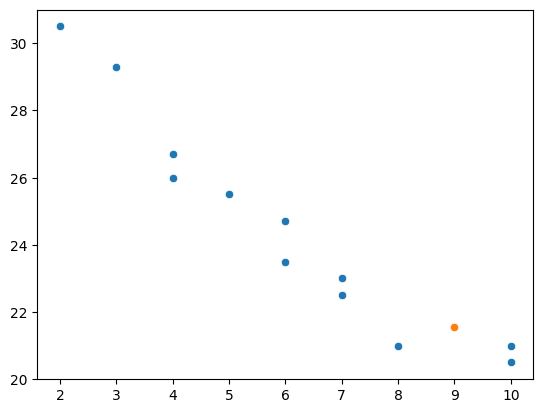

In [ ]:
sns.scatterplot(x=horas_entrenamiento, y=tiempo_promedio_en_mins)
sns.scatterplot(x=[horas], y=mins, markers=True)
plt.show()

# Ejercicio 4

El archivo CCPP.csv contiene 9568 datos de una central de ciclo combinado recolectados entre 2006 y 2011.
Usando la totalidad de los ejemplos se entrenaron 5 combinadores lineales con el objetivo de predecir el valor del atributo PE correspondiente a la cantidad de energía producida a partir del atributo AT (más detalles de este conjunto de datos aquí). Indique cuáles son los dos combinadores lineales con menor error cuadrático promedio a la hora de predecir el valor de PE en función de AT:

a) W = -2.00 ; b= 500

b) W = -2.21 ; b= 498

c) W = -2.30 ; b= 497

d) W = -2.22 ; b=496.5

e) W = -2.16 ; b=496.91


In [54]:
url_ccpp = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/CCPP.csv'
datos_ccpp = pd.read_csv(url_ccpp)

In [ ]:
datos_ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


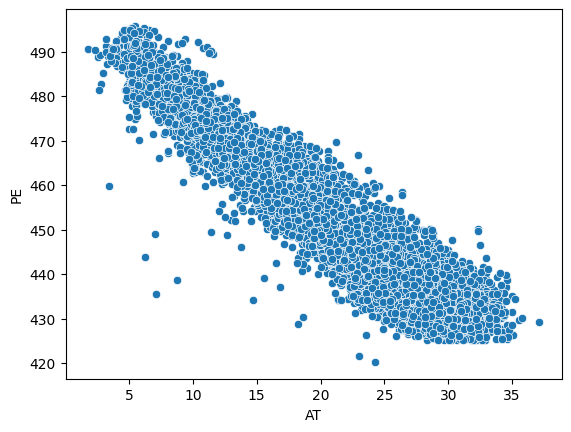

In [ ]:
sns.scatterplot(x='AT', y='PE', data=datos_ccpp)
plt.show()

##Cálculo MSE

In [55]:
X = datos_ccpp['AT'].values.reshape(-1,1)
Y = datos_ccpp['PE'].values.reshape(-1,1)

def mse(w,b, X, Y):
  sumaError = 0

  for i in range(len(X)):
    error = (Y[i] - (w*X[i] + b))**2
    sumaError += error

  return sumaError/len(X)

In [56]:
print(f'Combinador lineal 1: W=-2.00, b=500 MSE= {mse(-2.00, 500, X, Y)}')

print(f'Combinador lineal 2: W=-2.21, b=498 MSE= {mse(-2.21, 498, X, Y)}')

print(f'Combinador lineal 3: W=-2.30, b=497 MSE= {mse(-2.30, 497, X, Y)}')

print(f'Combinador lineal 4: W=-2.22, b=496.5 MSE= {mse(-2.22, 496.5, X, Y)}')

print(f'Combinador lineal 5: W=-2.16, b=496.91 MSE= {mse(-2.16, 496.91, X, Y)}')

Combinador lineal 1: W=-2.00, b=500 MSE= [71.16255476]
Combinador lineal 2: W=-2.21, b=498 MSE= [29.55712945]
Combinador lineal 3: W=-2.30, b=497 MSE= [36.91941198]
Combinador lineal 4: W=-2.22, b=496.5 MSE= [31.78561607]
Combinador lineal 5: W=-2.16, b=496.91 MSE= [29.44848719]


**Los combinadores lineales con menor error cuadrático medio son:**
* **Combinador 4**: W=-2.22, b=496.5, MSE=31,7856
* **Combinador 5**: W=-2.16, b=496.91, MSE=29,4485

# Ejercicio 5

A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor (atributo “engine-size”):


In [6]:
url = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/automobile-simple.csv'
autos = pd.read_csv(url)

In [13]:
autos.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459


In [28]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         205 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


##a)  Completar datos faltantes.

Antes de comenzar con el entrenamiento, complete los datos faltantes del
atributo “price” utilizando el valor promedio.


In [7]:
autos.isnull().sum()

,0
make,0
fuel-type,0
num-of-doors,2
body-style,0
curb-weight,0
engine-size,0
horsepower,2
city-mpg,0
highway-mpg,0
price,4


In [8]:
media = float(int(autos['price'].mean()))

In [9]:
autos.loc[autos['price'].isnull()]

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
9,audi,gas,two,hatchback,3053,131,160.0,16,22,NaN,629188.560,25.008890
44,isuzu,gas,two,sedan,1874,90,70.0,38,43,NaN,515592.480,65.105613
45,isuzu,gas,four,sedan,1909,90,70.0,38,43,NaN,515592.480,64.755162
129,porsche,gas,two,hatchback,3366,203,288.0,17,28,NaN,641507.055,29.678270


In [10]:
autos['price'].fillna(media, inplace=True)

In [11]:
autos.loc[44]

,44
make,isuzu
fuel-type,gas
num-of-doors,two
body-style,sedan
curb-weight,1874
engine-size,90
horsepower,70.0
city-mpg,38
highway-mpg,43
price,13207.0


In [12]:
autos = autos.dropna().copy()

In [13]:
autos.shape

(201, 12)

## b) Entrenar combinador

Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

i. Sin normalizar los atributos.

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

### i. Sin normalizar los atributos.

In [ ]:
modelo = NeuronaLineal(alpha=0.0001, n_iter=1000, cotaE=1e-6)

In [89]:
# Y = price, x = engine_size

Y = autos['price'].values.reshape(-1,1)
X_original = autos['engine-size'].values.reshape(-1,1)

In [90]:
modelo1 = modelo.fit(X_original,Y)

print(f'Pesos: \nW: {modelo1.w_} \nBias: {modelo1.b_}')

Pesos: 
W: [1.28520144e+11] 
Bias: [-1.8187237e+14]


In [91]:
print(f'MSE= {mse(modelo1.w_, modelo2.b_, X_original, Y)}')

MSE= [2.74348426e+28]


###ii. Normalizando ambos atributos linealmente.

In [69]:
norm_lineal = preprocessing.MinMaxScaler()

In [85]:
X = norm_lineal.fit_transform(autos['engine-size'].values.reshape(-1,1))

In [87]:
modelo2 = modelo.fit(X,Y)

print(f'Pesos: \nW: {modelo2.w_} \nBias: {modelo2.b_}')

Pesos: 
W: [18278.83711051] 
Bias: [8867.79666806]


In [88]:
print(f'MSE con normalización lineal: {mse(modelo2.w_, modelo2.b_, X, Y)}')

MSE con normalización lineal: [31482203.7035567]


###iii. Normalizando ambos atributos utilizando media y desvío.

In [75]:
avgstd_norm = preprocessing.StandardScaler()

In [76]:
X = avgstd_norm.fit_transform(autos['engine-size'].values.reshape(-1,1))

In [77]:
modelo3 = modelo.fit(X,Y)

print(f'Pesos: \nW: {modelo3.w_} \nBias: {modelo3.b_}')

Pesos: 
W: [6824.73248924] 
Bias: [13274.73744496]


In [78]:
print(f'MSE con normalización media y desvío: {mse(modelo3.w_, modelo3.b_, X,Y)}')

MSE con normalización media y desvío: [15961543.9586722]


# Ejercicio 6

Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente)

a) Utilizando el bias o peso W0 (comportamiento normal)

b) Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0 del cálculo.

Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos.
Observe el valor del arco correspondiente al bias en a).